In [1]:
import os
import tensorflow as tf
from ModelBuilderModule import ModelBuilderModule

In [11]:
DATA_PATH = r'~\GTZAN Dataset - Music Genre Classification\Data'
AUDIO_PATH = os.path.join(DATA_PATH,'genres_original')
JSON_PATH = 'mfcc_data.json'

In [3]:
#data = ModelBuilderModule.prepare_data(AUDIO_PATH, duration = 30)

Processing blues - 100x...
(661794,)
(661794,)
(661794,)
(661794,)
(661794,)
(661794,)
(661794,)
(661794,)
(661794,)
(661794,)
(661794,)
(661794,)
(661794,)
(661794,)
(661794,)
(661794,)
(661794,)
(661794,)
(661794,)


KeyboardInterrupt: 

In [3]:
#data = ModelBuilderModule.load_JSON('data.json')

In [4]:
data['mapping']

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [5]:
inputs = ModelBuilderModule.split_data(data['mfcc'], data['labels'], val_set = True, test_size = 0.05, val_size = 0.02)

In [7]:
inputs['x_train'].shape

(4648, 259, 13, 1)

In [8]:
n_class = len(data['mapping'])
model = ModelBuilderModule.createmodel((259, 13, 1), n_class)

Epoch 1/50
146/146 [==============================] - ETA: 0s - loss: 1.5152 - categorical_accuracy: 0.4705
Epoch 1: val_categorical_accuracy improved from -inf to 0.38947, saving model to checkpoints\mdl-01-0.389474.hdf5
146/146 [==============================] - 13s 17ms/step - loss: 1.5152 - categorical_accuracy: 0.4705 - val_loss: 1.7525 - val_categorical_accuracy: 0.3895
Epoch 2/50
143/146 [============================>.] - ETA: 0s - loss: 0.9947 - categorical_accuracy: 0.6541
Epoch 2: val_categorical_accuracy improved from 0.38947 to 0.63158, saving model to checkpoints\mdl-02-0.631579.hdf5
146/146 [==============================] - 1s 7ms/step - loss: 0.9937 - categorical_accuracy: 0.6538 - val_loss: 1.0403 - val_categorical_accuracy: 0.6316
Epoch 3/50
138/146 [===========================>..] - ETA: 0s - loss: 0.7057 - categorical_accuracy: 0.7495
Epoch 3: val_categorical_accuracy improved from 0.63158 to 0.69474, saving model to checkpoints\mdl-03-0.694737.hdf5
146/146 [=======

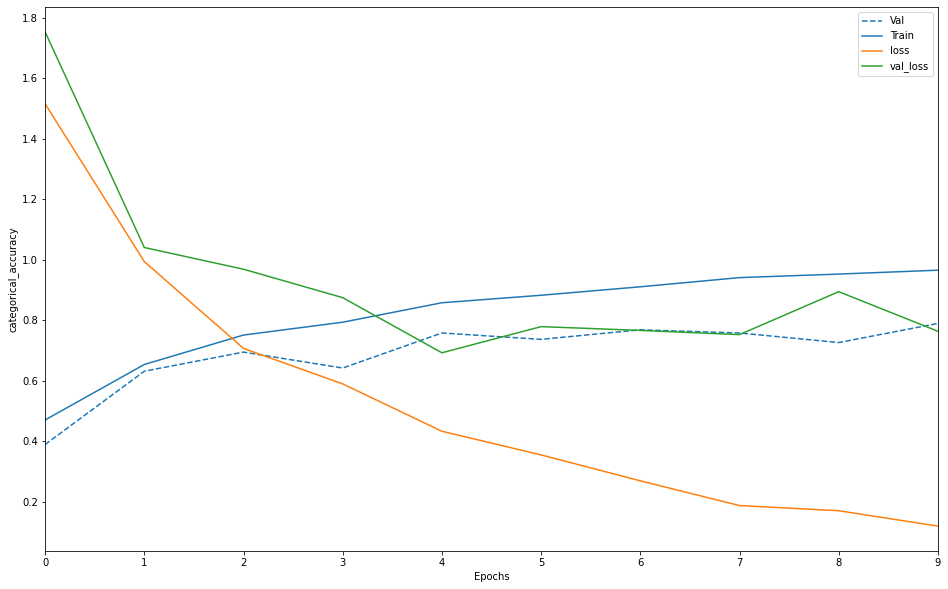

In [9]:
with tf.device('/gpu:0'):
    model = ModelBuilderModule.train(model, 
                                     inputs['x_train'], 
                                     inputs['y_train'], 
                                     50, 
                                     val_data = (inputs['x_val'], inputs['y_val']), 
                                     plot = True, earlyStop = True,
                                     modelname='test-model2')

In [10]:
test_error, accuracy = model.evaluate(inputs['x_test'], inputs['y_test'], verbose=1)

8/8 [==============================] - 0s 23ms/step - loss: 1.2538 - categorical_accuracy: 0.6480
